In [3]:
import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
mnist_train = torch.utils.data.Subset(
    datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor()),
    list(range(1000))
)
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=32, shuffle=True)

[2.0934233777225018, 1.090346316806972, 0.5568895945325494, 0.4553750613704324, 0.30533275566995144, 0.21204581391066313, 0.16404026024974883, 0.12565228377934545, 0.0844369048718363, 0.07955783534271177]
[1.6291308414440948, 0.8262048369398514, 0.7681663136798352, 0.5658175899102665, 0.4807470782924765, 0.5720709345211237, 0.5713988974119146, 0.5062173676495545, 0.510950469527953, 0.5509010160002655]


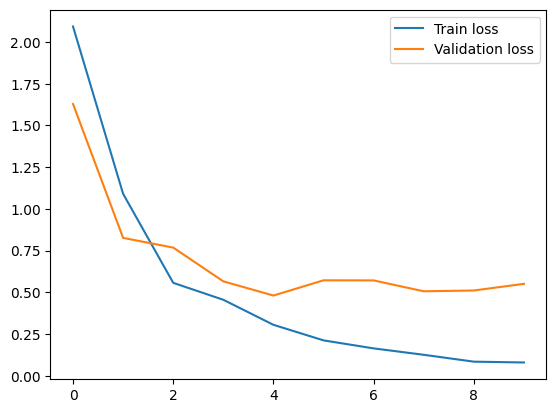

In [24]:
import matplotlib.pyplot as plt

model = nn.Sequential(
    nn.Linear(784, 500),
    nn.ReLU(),
    nn.Linear(500, 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []
for i in range(0, 10):
    model.train()
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum+=loss.item()
    train_losses.append(loss_sum / len(train_dataloader))

    val_loss_sum = 0
    model.eval()
    with torch.no_grad():
        for X, y in test_dataloader:
            X = X.reshape((-1, 784))
            y = F.one_hot(y, num_classes=10).type(torch.float32) 
            outputs = model(X)
            loss = loss_fn(outputs, y)
            val_loss_sum+=loss.item()
    val_losses.append(val_loss_sum / len(test_dataloader))
        

print(train_losses)
print(val_losses)
plt.plot(train_losses, label="Train loss")
plt.plot(val_losses, label="Validation loss")
plt.legend()
plt.show()

In [22]:
# print(len(test_dataloader))